# A Terribly Quick Introduction to Python

## Contents:

1. What is Python and how is it different from programming languages like 'C'?
2. Methods
3. Data types and Arithmetic operations
4. Arrays and Matrices
5. Importing data
6. Visualising the data
7. Fast Fourier Transform
8. Designing a Low Pass Butterworth filter
9. Analysing filter response
10. Other types of IIR filters
11. Moving Average and Median filters
12. Downloading the notebook

## 1. What is Python and how is it different from programming languages like 'C'?

Python is a programming language that is extremely varsatile as it can be used for a huge variety of applications, from web servers to Digital Signal Processing (DSP). It has a gentle learning curve and a lot of support. One complaint about Python is that it is slower than other languages such as 'C' but there is ongoing work to improve it's efficiency. It is one reason why Python is rarely used in environments with tight resource constraints (e.g. slower processor and smaller memory) like the microprocessors in refrigerators.

In conventional programming languages like 'C', Individual files written in C code (files with '.c' extension) is processed by the compiler to generate object code (files with '.o' extension). Subsequently, a linker is used to combine the intermediate object code together to form a single executable (files with '.exe' extensions) - this comprises of the assembly code or instructions that are executed by the processor. In addition, the program makes use of memory to store objects e.g. arrays containing signal samples. The object/s might be abandoned at some point in the program and it is the responsibility of the programmer to deallocate the memory so it might useful somewhere else. This process is known as 'manual deallocation'. 

Python is different in the following ways.

1. A compilation step is necessary for python as well, creating files with '.pyc' extension. Rather than generating object code or executables, the compiler generates bytecode, which is then executed by an interpreter on a Virtual Machine instead of the processor. Doing it in this manner allows the same bit of code to be executed in very different environments (such as a PC and a Linux based machine) as different types of bytecode suitable to the target machine can be generated. For this reason, Python is known as an 'interpreted language'.

2. Another important feature in Python where previously useful and currently unuseful memory is automatically deallocated. This feature is known as garbage collection.

One trick used by Python to speed up execution is by caching bytecode in folders called '__pycache__' so that the compilation step can be skipped if no changes to the original Python source code are detected. 

## 2. Methods

Python methods share similarities with mathematical functions. One example is shown below.

$y = f(x)$

Function $f$ takes in the input $x$ and maps it to output $y$. We further define the function $f$ as follows.

$f(x) = x + 1$

Trivially, if $x = 2$, it follows that $f(x) = 3$. Implementation in Python is straightforward as follows. After defining the method, we have to execute it to perform our calculation.

In [1]:
# Implement function f as a Python method.
def f(x):
    x = x + 1
    return x

# Execute the method.
y = f(2)
print("Result from f: %d" % y)

Result from f: 3


## 3. Data Types

In mathematics, there are different types of numbers. Examples include real numbers, integers, and complex numbers.

In Python, real numbers are represented using floating point numbers. Exactly implementing a number like $\pi = 3.142...$ is impossible because it has an infinite number of places after the decimal point. A floating point representation could be $3.142 \times 10^0$ where there is a truncation after 3 decimal places and an exponent of 0 (in reality, numbers are stored in binary and precision for mantissa (3.142 in this case) and exponent (0 in this case) are higher). 

Representing integers is simpler as there is no need for an exponent. We simply need a representation with sufficient range. Complex numbers simply involve 2 floats to represent the real and the imaginary parts. Usually, we do not need to worry about the number type because of a Python feature known as dynamic binding, where the type assumed by a variable is determined at the last possible moment. Arithmetic operations involving different data types are automatically handled.

In [2]:
# Provide examples to illustrate dynamic typing and impact on arithmetic operations.
a = 2    # a is an integer type
a = 2.5  # a is NOW a floating point type.

b = 8
c = a + b

# Put the result in 'c'.
print("What is c? %f" % c)


# Arithmetic operations
a = a + b
print("a+b = %f" % c)

a += 1
print("a = %f" % a)

c = a*b
print("c = %f" % c)

c = a/b
print("c = %f" % c)


What is c? 10.500000
a+b = 10.500000
a = 11.500000
c = 92.000000
c = 1.437500


Python offers an important and tremendously useful data type known as dictionaries. A dictionary consists of a 'key, value' pair where the value is retrieved by a unique key within the dictionary. We illustrate this below.

In [3]:
# An example.
a_dict = {
    "key1": "hello",
    "key2": "world"
}

# Read the values out and print them out as a concatenated string separated by a space.
dict_str = a_dict['key1'] + ' ' + a_dict['key2'] + '!'
print(dict_str)

# Get the keys of a dictionary.
print("What keys? %s" % str(a_dict.keys()))

hello world!
What keys? dict_keys(['key1', 'key2'])


## 4. Arrays and Matrices

An array hold mulitple numbers as a single entity and each entry is located at a specific location in the array. Further, each array element can be accessed via an array index. An example is shown below. 

In [4]:
# We import a very useful python package known as Numpy to create arrays and operate on them.
import numpy as np

# Array initialisation.
a = np.array([1,3,2,4])
b = np.zeros(4)
c = np.ones(4)

# Arithmetic operations on arrays.
d = str(a + b)
print("d = %s" % d)

d = str(a * b)
print("d = %s" % d)

# Passing an array to a method.
def theMtd(what):
    print(str(what))

theMtd(b)

d = [1. 3. 2. 4.]
d = [0. 0. 0. 0.]
[0. 0. 0. 0.]


## Matrices

Arrays are one-dimensional entities. To generalise, we create multi-dimensional entities or matrices. Similar arithmetic operations can be carried out on these matrices.

In [5]:
# Create 2D matrix populated by zeros.
a = np.zeros((2,2))
print("a =" + str(a) + "\n")

# Create 2D matrix populated by twos.
b = np.ones((2,2))*2.0
print("b =" + str(b) + "\n")

# Create method to multiply 2 matrices
def mat_mul(m1, m2):
  O = m1*m2
  return O
      
# Call method and print out the results.
c = mat_mul(a, b)
msg = str(c) + ", size: " + str(c.shape)
print(str(msg))


a =[[0. 0.]
 [0. 0.]]

b =[[2. 2.]
 [2. 2.]]

[[0. 0.]
 [0. 0.]], size: (2, 2)


## 5. Importing data

So far, it hasn't been very interesting. What we lack is a dataset that we can play with. To this, let's import some data. Refer to the link below for how to do it - the data file should should be accompanied with this notebook.

https://mftechno.com/wp-content/uploads/2021/05/file_upload.mp4

Note that the file 'data.pkl' is known to be in pickle format. We need to extract the data from this file first before its useable. The code below is used to 'unpickle' the file. Note that you need to specify the PATH or location of the file precisely - you can copy it from the top right panel. 

In [7]:
# Import package to work with pickle files.
import pickle as pk

# Unpickle the data.
with open('./data.pkl', "rb") as fid:
    data = pk.load(fid)

# Print out the type for data.
print("Data type: %s" % str(type(data)))

# Print out the keys.
print("Keys: %s" % str(data.keys()))

# Have a look at some of the values.
print("signal: " + str(data['signal'][:10]))
print("noise: " + str(data['noise'][:10]))


Data type: <class 'dict'>
Keys: dict_keys(['signal', 'noise', 'noisy_sine_one', 'noisy_sine_two', 'sampling_freq_Hz'])
signal: [ 0.          4.25779292  7.70513243  9.68583161  9.82287251  8.09016994
  4.81753674  0.6279052  -3.68124553 -7.28968627]
noise: [ 0.0000000e+00  1.0000000e+01  1.2246468e-15 -1.0000000e+01
 -2.4492936e-15  1.0000000e+01  3.6739404e-15 -1.0000000e+01
 -4.8985872e-15  1.0000000e+01]


## 6. Visualising the Data

Often, it is far quicker and more intuitive to illustrate the data in the form of a chart rather than printing them out as strings. 

We will now chart the signal, noise, as well as the summation of both for use later on.

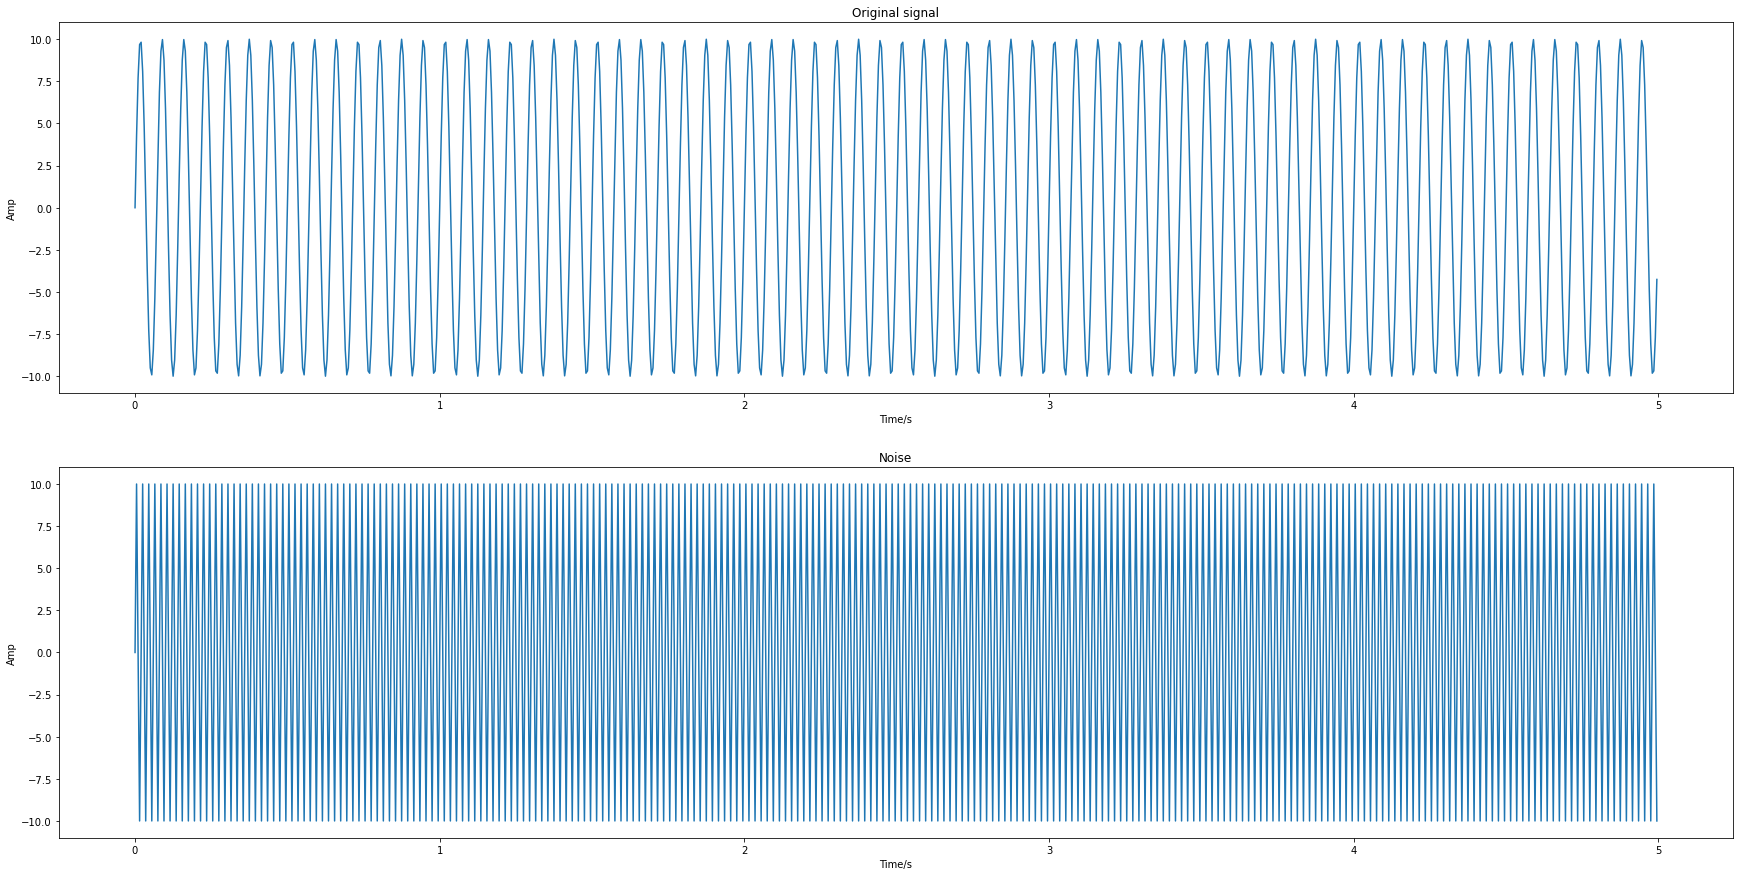

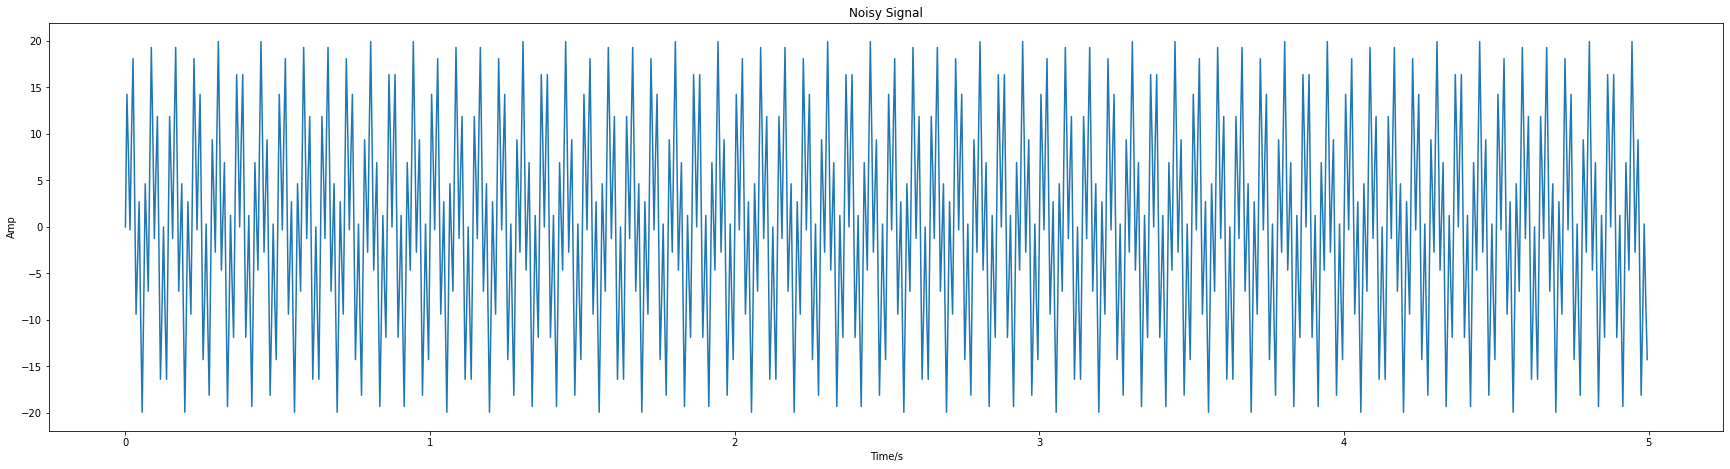

In [8]:
# Import package used for plotting charts.
import matplotlib.pyplot as plt

# Create the figure & axis handles for the plot.
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(30,15))

# Create time axis.
time = np.arange(len(data['signal']))   # This creates an array starting from 0, 1, .. length of the signal-1.
time = time/data['sampling_freq_Hz']        # Divides each element by the sampling frequency to obtain seconds.

# Plot the signals signal and noise.
ax1.plot(time, data['signal'])
ax1.set(xlabel = 'Time/s',
       ylabel = 'Amp',
       title = 'Original signal')

ax2.plot(time, data['noise'])
ax2.set(xlabel = 'Time/s',
       ylabel = 'Amp',
       title = 'Noise')

plt.show()

# Add them together and plot the resulting signal.
noisy_signal = data['signal'] + data['noise']

# Write this to the dictionary.
data['noisy_signal'] = noisy_signal

# Create another plot.
fig, ax = plt.subplots(figsize=(30,7.5))

ax.plot(time, noisy_signal)
ax.set(xlabel = 'Time/s',
      ylabel = 'Amp',
      title = 'Noisy Signal')

plt.show()

## 7. Fast Fourier Transform

Eyeballing the data tells us that the actual signal is low frequency and noise is high frequency. We can certainly take measurements between the peaks to determine what the respective frequencies are. However, in this case, we are lucky to have the original signal and noise signals. If we pretend that we don't, it will be more difficult to measure periods of the noisy signal in an accurate manner as there are more than one frequency component within the signal.

Another way to perform this analysis is to make use of the FFT to map the signal to the frequency domain and analyse the signal in that space. We do this below.

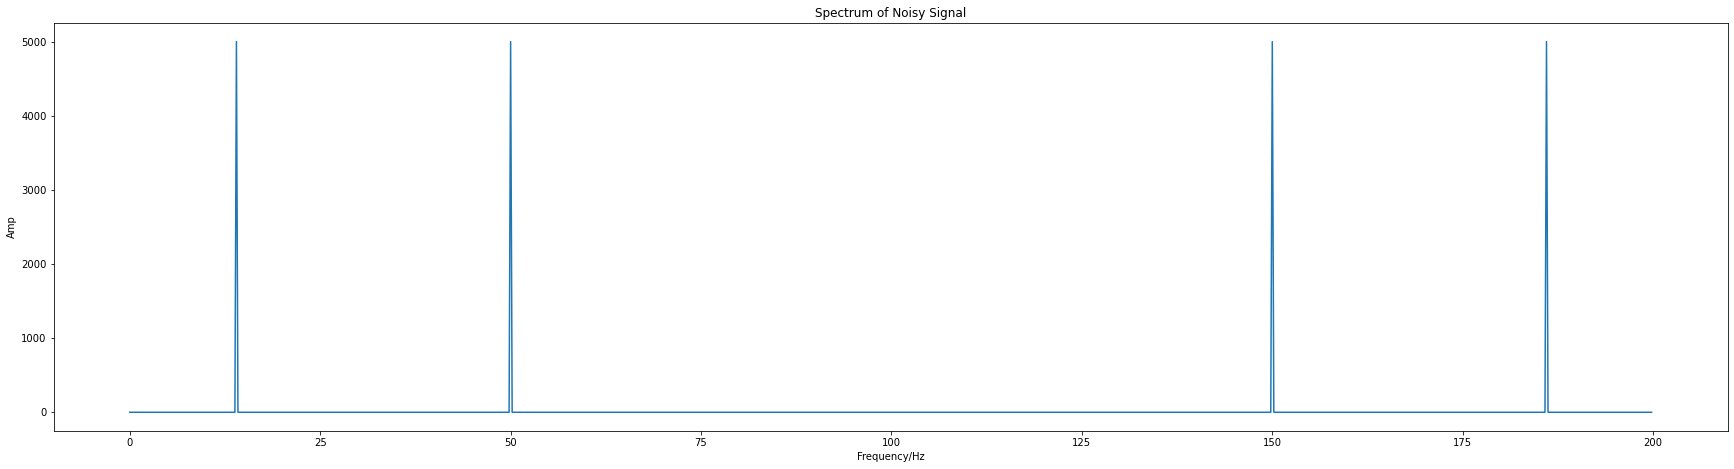

Frequencies of interest/Hz:
 [[ 14.]
 [ 50.]
 [150.]
 [186.]]


In [9]:
# We obtain the fft module from the SCIPY package.
from scipy.fft import fft

# Create the frequency axis. 
frequency = np.arange(len(data['noisy_signal']))*(data['sampling_freq_Hz']/len(data['noisy_signal']))

# Carry out the FFT on the noisy signal.
spectrum = fft(data['noisy_signal'])

# Take magnitude of the spectrum.
spectrum_abs = np.abs(spectrum)

# Plot the spectrum.
fig, ax = plt.subplots(figsize=(30,7.5))

ax.plot(frequency, spectrum_abs)
ax.set(xlabel = 'Frequency/Hz',
      ylabel = 'Amp',
      title = 'Spectrum of Noisy Signal')

plt.show()

# Identity location of peaks.
threshold = np.max(spectrum_abs)/2.0
indices = np.argwhere(spectrum_abs > threshold)
print("Frequencies of interest/Hz:\n %s" % frequency[indices])

## 8. Designing a Low Pass Butterworth filter

From our analysis, the signal content is a sinusoid at 14 Hz and the noise is at a higher frequency of 50 Hz. Therefore, we can design a low pass filter with a cut-off frequency of 30 Hz.

We will use the Scipy package to create our filter. This link provides information about the method and describes the inputs and outputs.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html

The filter design method will create the filter coefficients for us. We will then need to deploy this filter. To do so, we make use of another method known as 'filtfilt'. More information here.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.filtfilt.html

There are other deployment methods such as 'filter'. We choose 'filtfilt' here because of its phase correction properties but we will not discuss this in detail here.

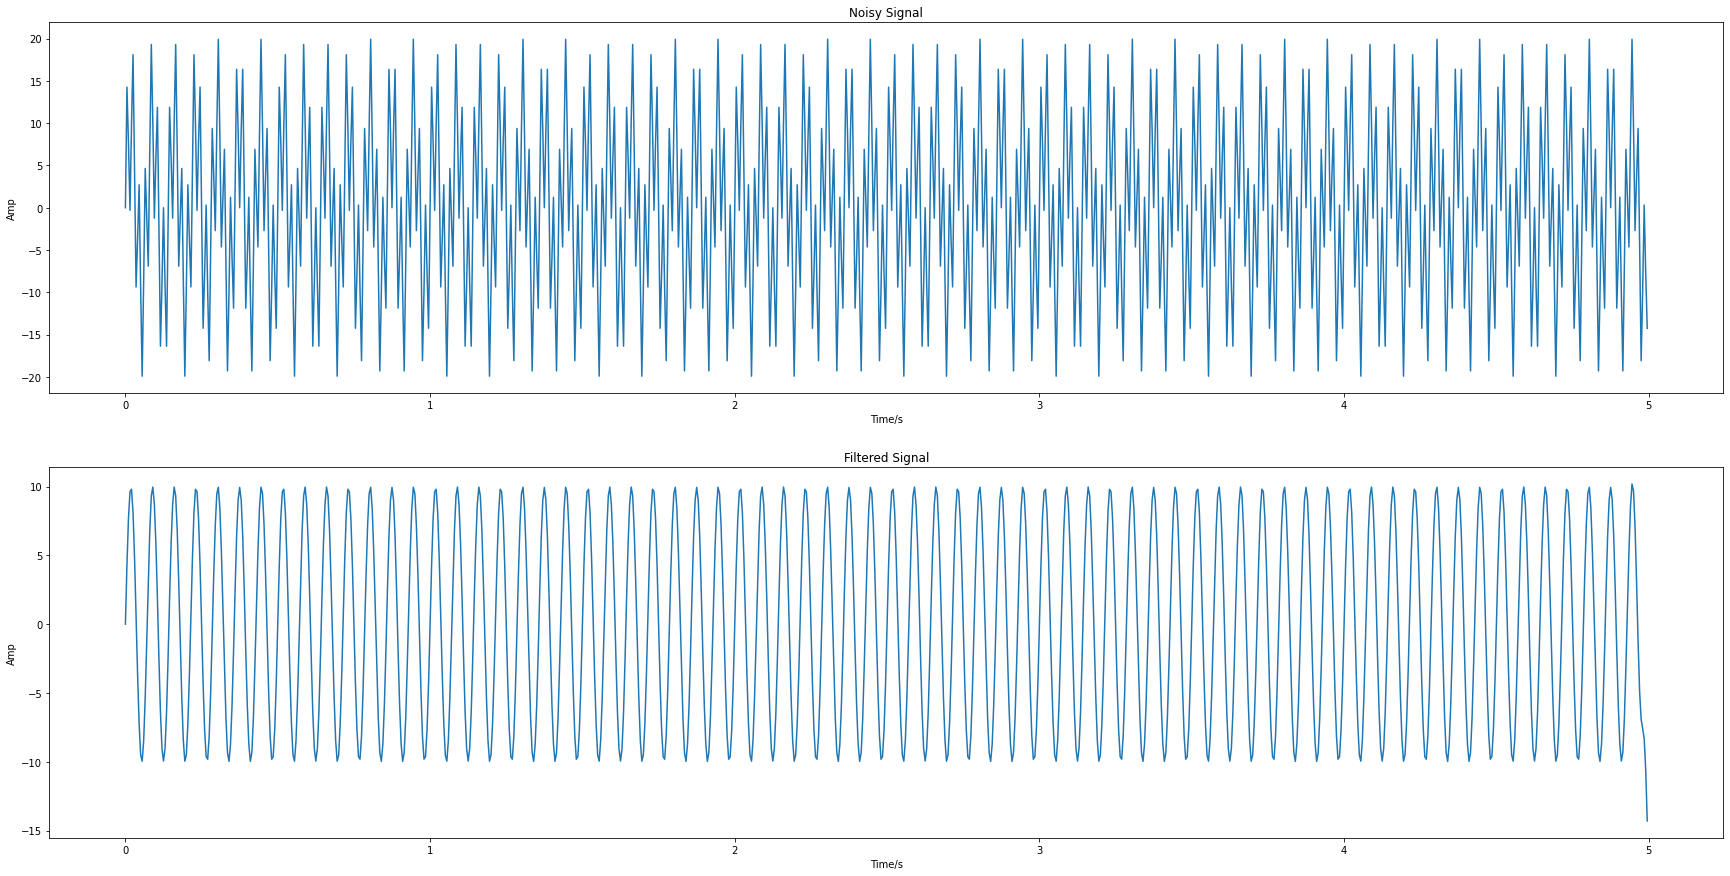

In [10]:
# Import the filter design package.
from scipy import signal

# Filter parameters.
N = 4                                               # Filter order.
cutOff = 30.0/(data['sampling_freq_Hz']/2)          # Cut-Off frequency in rad/s.
btype = 'low'

# Obtain filter coefficients here.
b, a = signal.butter(N, cutOff, btype)

# Use the filter here.
filtered = signal.filtfilt(b, a, noisy_signal)

# Let's have a look at the signal.
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30,15))

ax1.plot(time, data['noisy_signal'])
ax1.set(xlabel = 'Time/s',
      ylabel = 'Amp',
      title = 'Noisy Signal')

ax2.plot(time, filtered)
ax2.set(xlabel = 'Time/s',
      ylabel = 'Amp',
      title = 'Filtered Signal')

plt.show()

## 9. Analysing filter response

To understand the filter that we designed a little more, we look at its frequency response below. Have a look at the freqz method.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html

3 dB point at 30.078125 Hz


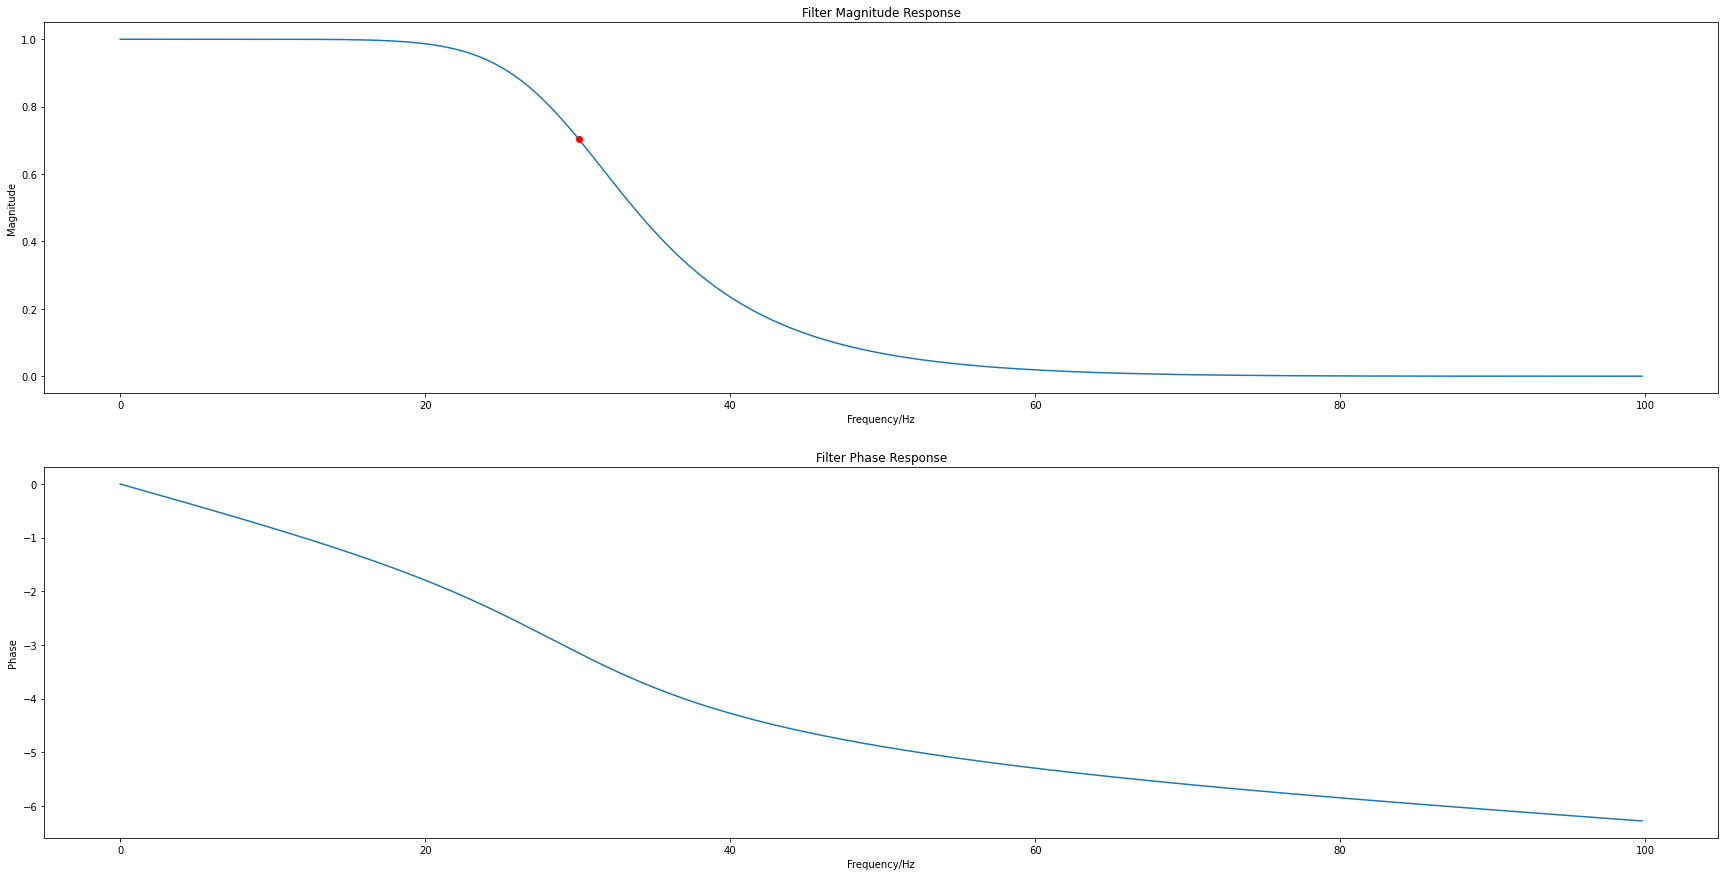

In [11]:
# Obtain the frequency response of the filter.
frequency, freq_response = signal.freqz(b, a, fs=data['sampling_freq_Hz'])

# Obtain the magnitude response.
magnitude_response = np.abs(freq_response)

# Obtain the phase response of the filter.
phase_response = np.unwrap(np.angle(freq_response))

# Plot frequency response.
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30,15))

ax1.plot(frequency, magnitude_response)
ax1.set(xlabel = 'Frequency/Hz',
      ylabel = 'Magnitude',
      title = 'Filter Magnitude Response')

ax2.plot(frequency, phase_response)
ax2.set(xlabel = 'Frequency/Hz',
      ylabel = 'Phase',
      title = 'Filter Phase Response')

# Find the 3 dB point.
deltas = np.abs(magnitude_response - np.ones(magnitude_response.shape)*(10**(-3/20.0)))
index = np.argmin(deltas)
print("3 dB point at %f Hz" % frequency[index])

ax1.plot(frequency[index], magnitude_response[index], 'ro')


## 10. Other types of filters

Butterworth filters have a flat response in the passband and the stopband. The transition band is usually gradual as compared to other filter types. Even within the Butterworth framework, there are different types of filters that serve different purposes according to the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html).  

```
btype{‘lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’}, optional
The type of filter. Default is ‘lowpass’.
```
Apart from the Butterworth, there are other types of IIR filters that are useful. We list a few here.

Chebyshev Type I filter: [cheby1(N, rp, Wn, btype='low', analog=False, output='ba')](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.cheby1.html)

Chebyshev Type II filter: [scipy.signal.cheby2(N, rs, Wn, btype='low', analog=False, output='ba')](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.cheby2.html)

Elliptic filter: [ellip(N, rp, rs, Wn, btype='low', analog=False, output='ba', fs=None)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.ellip.html#scipy.signal.ellip)



## 11. Moving Average and Median filters

Simpler types of filters such as the Moving average and the Median filters are frequently used as well.

The Moving average filter is popular because of its simplicity and because there are few parameters to adjust. It is used primarily to 'smoothen' signals. An example is shown below.

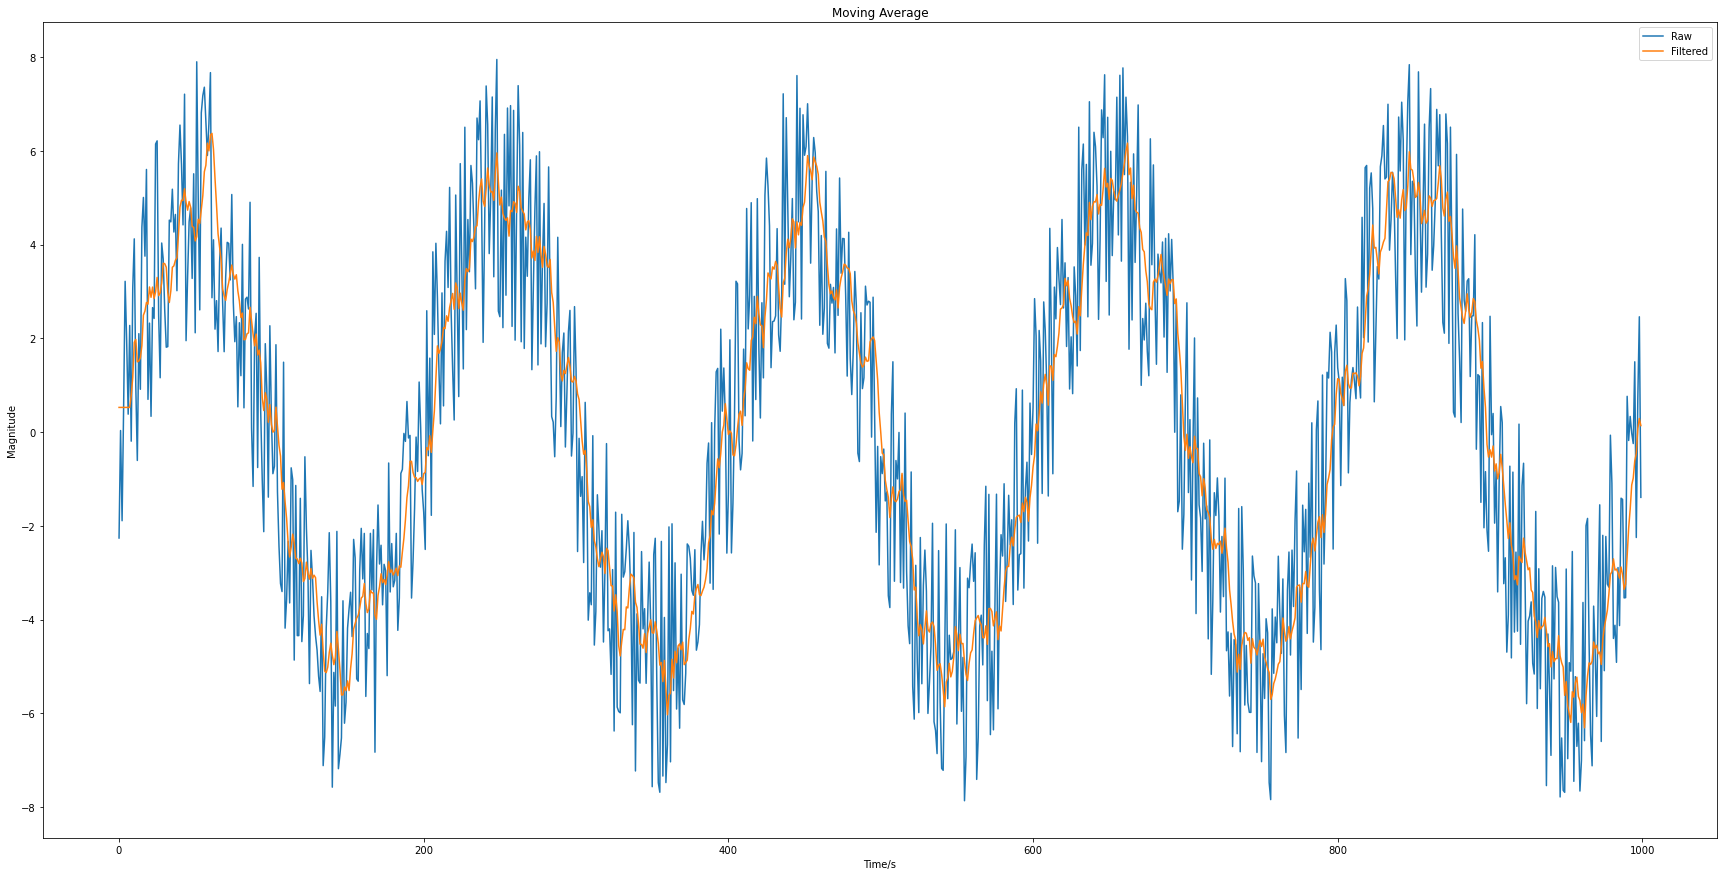

In [12]:
def moving_avg(input_signal, window_sz=8):
    result = np.zeros(input_signal.shape)
    result[:window_sz] = np.mean(input_signal[:window_sz])*np.ones(window_sz)
    
    index=window_sz
    while index<len(input_signal):
        l = index-window_sz+1
        window = input_signal[l:(index+1)]
        mean_val = np.mean(window)
        result[index] = mean_val
        index += 1
        
    return result

# Smooth data with moving average. Start with window size of 8 and increase to 64.
output = moving_avg(data['noisy_sine_one'], 8)

# Plot averaged signal.
fig, ax1 = plt.subplots(figsize=(30,15))

ax1.plot(data['noisy_sine_one'])
ax1.plot(output)
ax1.set(xlabel = 'Time/s',
      ylabel = 'Magnitude',
      title = 'Moving Average')
ax1.legend(['Raw', 'Filtered'])
plt.show()

Next, we show a sine wave corrupted by spikes - extreme values or outliers. The median filter is an excellent choice for removing this sort of noise.

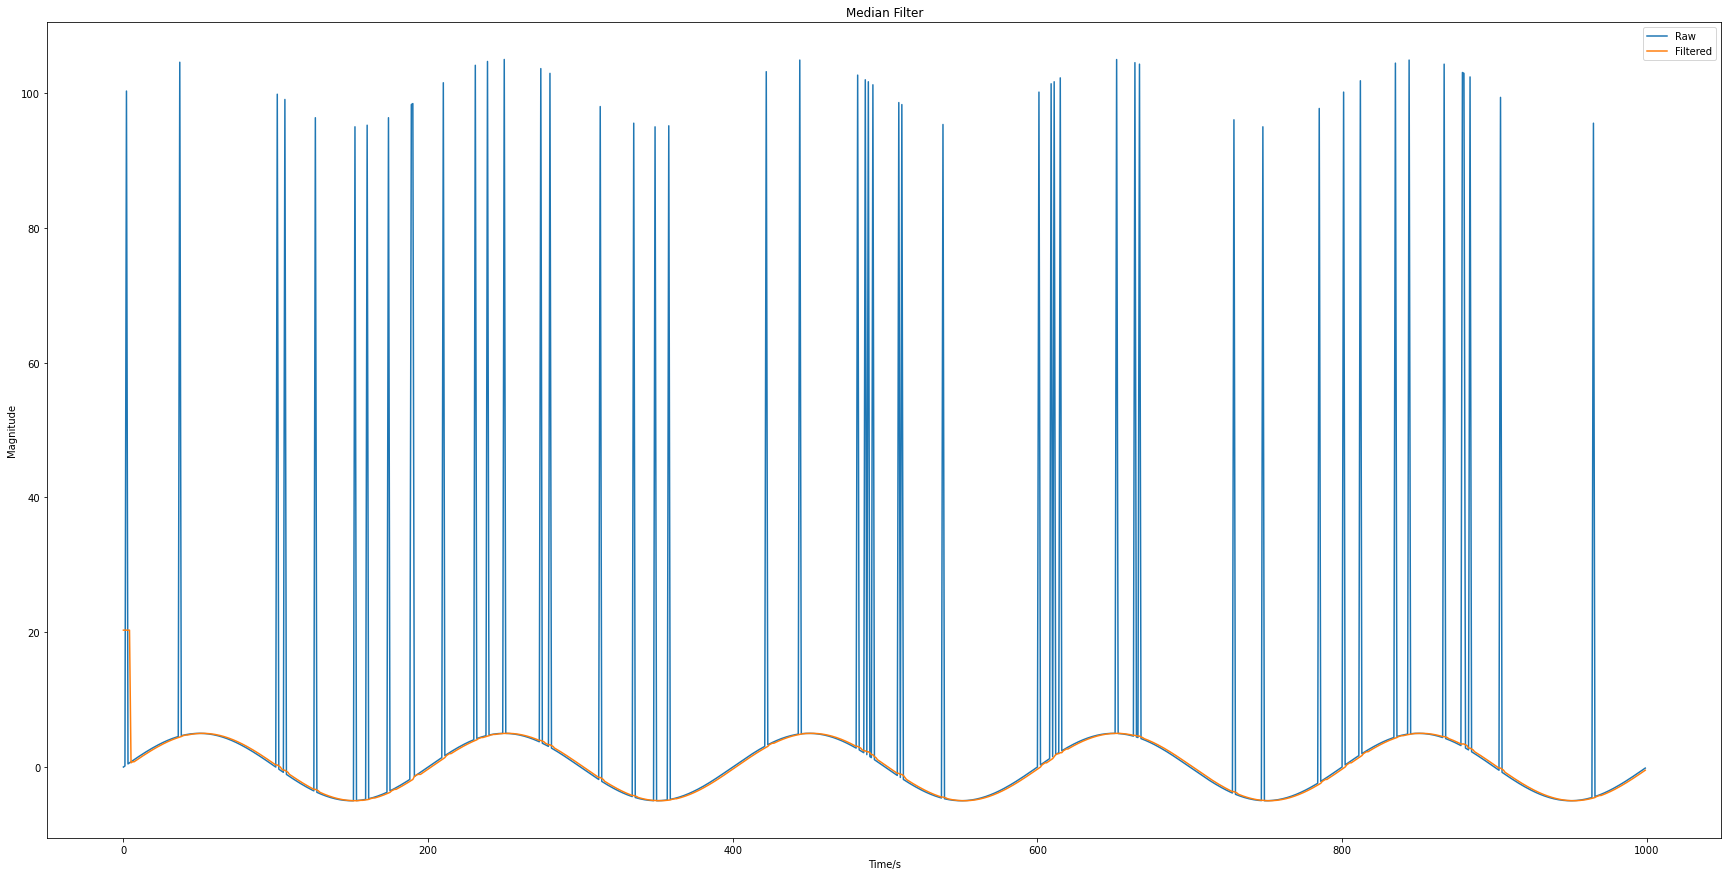

In [13]:
def median_filter(input_signal, window_sz=3):
    result = np.zeros(len(input_signal))
    
    result[:window_sz] = np.mean(input_signal[:window_sz])
    index=window_sz
    while index<len(input_signal):
        l = index-window_sz+1
        window = input_signal[l:(index+1)]
        median_val = np.median(window)
        result[index] = median_val
        index += 1
    
    return result

# Outlier removal with the median filter. Start with window size of 3 and increase to 64.
output = median_filter(data['noisy_sine_two'], 5)

# Plot averaged signal.
fig, ax1 = plt.subplots(figsize=(30,15))

ax1.plot(data['noisy_sine_two'])
ax1.plot(output)
ax1.set(xlabel = 'Time/s',
      ylabel = 'Magnitude',
      title = 'Median Filter')
ax1.legend(['Raw', 'Filtered'])
plt.show()

## 12. Downloading the Notebook

You need to download the Notebook from Kaggle (if this is the environment that you are working in) in order to submit you assignment. Follow the video link below to do so.

https://mftechno.com/wp-content/uploads/2021/05/download_notebook.mp4